# Calculating Confidence Intervals

The Air Quality Index (AQI) is the Environmental Protection Agency's index for reporting air quality. A value close to 0 signals little to no public health concern, while higher values are associated with increased risk to public health. The United States is considering a new federal policy that would create subsidy for renewable energy in states observing an average AQI of 10 or above.

Ripple Renewable Energy (RRE) is an agency that deals in Renewable Energy. **RRE operates in the following U.S. states: `California`, `Florida`, `Michigan`, `Ohio`, `Pennsylvania`, `Texas`.** An analysis can be done of these states to check which states are most likely to be affected, should the new federal policy be enacted.

For this analysis:

1. I will provide a summary of the mean AQI for the states in which RRE operates.
2. I will construct a boxplot visualization for AQI of these states using `seaborn`.
3. Evaluate which state(s) may be most affected by this policy, based on the data and your boxplot visualization.
4. Construct a confidence interval for the RRE state with the highest mean AQI.

In [1]:
import numpy as np
import pandas as pd

In [2]:
aqi = pd.read_csv('c4_epa_air_quality.csv')

In [3]:
aqi.head()

,Unnamed: 0,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,arithmetic_mean,aqi
0,0,2018-01-01,Arizona,Maricopa,Buckeye,BUCKEYE,Carbon monoxide,Parts per million,0.473684,7
1,1,2018-01-01,Ohio,Belmont,Shadyside,Shadyside,Carbon monoxide,Parts per million,0.263158,5
2,2,2018-01-01,Wyoming,Teton,Not in a city,Yellowstone National Park - Old Faithful Snow ...,Carbon monoxide,Parts per million,0.111111,2
3,3,2018-01-01,Pennsylvania,Philadelphia,Philadelphia,North East Waste (NEW),Carbon monoxide,Parts per million,0.300000,3
4,4,2018-01-01,Iowa,Polk,Des Moines,CARPENTER,Carbon monoxide,Parts per million,0.215789,3


Now I will check how many data points are there for each state. These data points could be the result of recordings of AQI at various locations within that state. There is also a possibility that these data points were recorded at the same location but at different time.

In [4]:
aqi['state_name'].value_counts()

California              66
Arizona                 14
Ohio                    12
Florida                 12
Texas                   10
New York                10
Pennsylvania            10
Michigan                 9
Colorado                 9
Minnesota                7
New Jersey               6
Indiana                  5
North Carolina           4
Massachusetts            4
Maryland                 4
Oklahoma                 4
Virginia                 4
Nevada                   4
Connecticut              4
Kentucky                 3
Missouri                 3
Wyoming                  3
Iowa                     3
Hawaii                   3
Utah                     3
Vermont                  3
Illinois                 3
New Hampshire            2
District Of Columbia     2
New Mexico               2
Montana                  2
Oregon                   2
Alaska                   2
Georgia                  2
Washington               2
Idaho                    2
Nebraska                 2
R

Now, let us come to the first point of this analysis. I have to find mean aqi for all the states where RRE is present. For that I have to first filter all the data from these states.

In [5]:
rre_states = aqi[aqi['state_name'].isin(['California', 'Florida', 'Michigan', 'Ohio', 'Pennsylvania', 'Texas'])]

rre_states.groupby(['state_name'])['aqi'].agg(['mean', 'count']).reset_index()

,state_name,mean,count
0,California,12.121212,66
1,Florida,5.500000,12
2,Michigan,8.111111,9
3,Ohio,3.333333,12
4,Pennsylvania,2.900000,10
5,Texas,2.700000,10


Now, let us come to the second objective of this analysis.

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

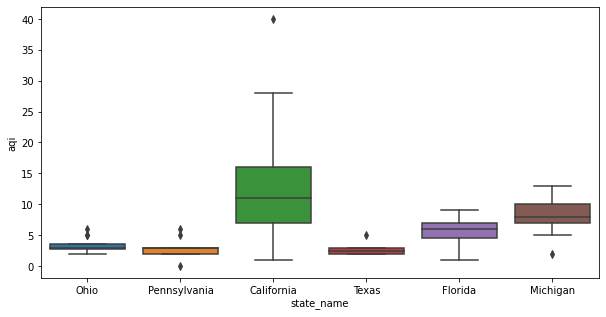

In [7]:
plt.figure(figsize=(10,5))
sns.boxplot(x=rre_states['state_name'], y=rre_states['aqi'])
plt.show()

Coming to our third objective, seems like California will be the most affected state because its mean and median both are above 12.

We will now come to our final step of calculating the confidence interval without using the stats package.

Confidence interval can be calculated using 4 easy steps:

1.   Identify a sample statistic.
2.   Choose a confidence level.
3.   Find the margin of error.
4.   Calculate the interval.

The sample statistic that we will be considering will be mean. So I will just store California's AQI mean in a seperate variable.

In [8]:
california_aqi = rre_states[rre_states['state_name'] == 'California']
california_aqi_mean = california_aqi['aqi'].mean()
california_aqi_mean

12.121212121212121

Now, we have to choose confidence level for our analysis. The most typical confidence level chosen is 95%; however, we can choose 90% or 99% if we want decrease or increase (respectively) our level of confidence about our result.

In [9]:
confidence_level = 0.95

Now let us calculate the Margin of Error

The formula to calculate margin of error is: **margin of error = z * standard error**, where z is the appropriate z-value for the given confidence level. To calculate your margin of error:

- Find the z-value. 
- Find the approximate z for common confidence levels.
- Calculate your **standard error** estimate. 

| Confidence Level | Z Score |
| --- | --- |
| 90% | 1.65 |
| 95% | 1.96 |
| 99% | 2.58 |


Standard Error is calculated using the formula **Standard Error = Standard Deviation / Square root of Sample Size**

In [10]:
z = 1.96

standard_error = california_aqi['aqi'].std() / np.sqrt(california_aqi['aqi'].count())

margin_of_error = z * standard_error
margin_of_error

1.7614930896609726

Finally, to calculate the Confidence Interval, we will find the upper level of the confidence interval which is given by **upper level = mean + margin of error** and we will find the lower level of the confidence interval which is given by **lower level = mean - margin of error**

In [11]:
upper_limit = california_aqi_mean + margin_of_error
lower_limit = california_aqi_mean - margin_of_error
print(f'CI [{lower_limit}, {upper_limit}]')

CI [10.359719031551148, 13.882705210873095]


So far we calculated Confidence Interval without using the stats package. Now let us calculate it using the stats package. The stats package exists in scipy library.

In [12]:
from scipy import stats

In [13]:
stats.norm.interval(alpha=0.95, loc=california_aqi_mean, scale=standard_error)

(10.359751399400034, 13.882672843024208)

And Voila!
The stats package calculates the same values of Confidence Interval in one line.